In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
#reading the excel file
df = pd.read_excel('meter_data.xlsx')

In [4]:
df.columns = df.columns.str.strip().str.lower()

In [5]:
original_data = df.copy()

In [6]:
#displaying the columns
print(df.columns.tolist())

['localtimecol', 'metercode', 'fr', 'fv', 'nettotal', 'today']


In [7]:
#displaying first 5 rows
df.head()

,localtimecol,metercode,fr,fv,nettotal,today
0,2025-05-02 00:00:00,BFM 01,392.96,0.54,100685.77,0.00
1,2025-05-02 00:15:00,BFM 01,262.06,0.51,100687.11,1.34
2,2025-05-02 00:30:00,BFM 01,319.94,0.50,100688.71,3.20
3,2025-05-02 00:45:00,BFM 01,294.27,0.46,100690.06,4.06
4,2025-05-02 01:00:00,BFM 01,294.65,0.51,100691.57,6.01


In [8]:
#displaying last 5 rows
df.tail()

,localtimecol,metercode,fr,fv,nettotal,today
1915,2025-05-03 22:45:00,BFM 10,309.32,0.48,100670.16,135.11
1916,2025-05-03 23:00:00,BFM 10,341.24,0.60,100672.20,188.36
1917,2025-05-03 23:15:00,BFM 10,399.22,0.56,100674.44,207.91
1918,2025-05-03 23:30:00,BFM 10,263.60,0.48,100675.70,118.94
1919,2025-05-03 23:45:00,BFM 10,373.98,0.50,100677.57,177.64


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   localtimecol  1920 non-null   datetime64[ns]
 1   metercode     1920 non-null   object        
 2   fr            1920 non-null   float64       
 3   fv            1920 non-null   float64       
 4   nettotal      1920 non-null   float64       
 5   today         1920 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 90.1+ KB


In [10]:
df.describe()

,localtimecol,fr,fv,nettotal,today
count,1920,1920.000000,1920.000000,1920.000000,1920.000000
mean,2025-05-02 23:52:30,350.438187,0.501656,100762.141438,83.388604
min,2025-05-02 00:00:00,174.180000,0.310000,100340.310000,0.000000
25%,2025-05-02 11:56:15,318.450000,0.470000,100616.887500,40.150000
50%,2025-05-02 23:52:30,350.165000,0.500000,100755.455000,80.050000
75%,2025-05-03 11:48:45,383.972500,0.540000,100898.457500,121.095000
max,2025-05-03 23:45:00,518.160000,0.680000,101170.180000,249.030000
std,NaN,49.270427,0.050575,186.348500,51.455748


In [11]:
df.metercode.value_counts()

metercode
BFM 01    192
BFM 02    192
BFM 03    192
BFM 04    192
BFM 05    192
BFM 06    192
BFM 07    192
BFM 08    192
BFM 09    192
BFM 10    192
Name: count, dtype: int64

In [12]:
#checking for null values
null_percentage = (df.isnull().sum()/len(df))*100
null_percentage

localtimecol    0.0
metercode       0.0
fr              0.0
fv              0.0
nettotal        0.0
today           0.0
dtype: float64

#####  Imputation is not required because of no null values in the dfset

In [13]:
#Extracting hour from the 'localtimecol'
df['hour'] = df['localtimecol'].dt.hour

In [14]:
# dispalying all row from the dfset
pd.set_option('display.max_rows',None)
df

,localtimecol,metercode,fr,fv,nettotal,today,hour
0,2025-05-02 00:00:00,BFM 01,392.96,0.54,100685.77,0.00,0
1,2025-05-02 00:15:00,BFM 01,262.06,0.51,100687.11,1.34,0
2,2025-05-02 00:30:00,BFM 01,319.94,0.50,100688.71,3.20,0
3,2025-05-02 00:45:00,BFM 01,294.27,0.46,100690.06,4.06,0
4,2025-05-02 01:00:00,BFM 01,294.65,0.51,100691.57,6.01,1
5,2025-05-02 01:15:00,BFM 01,305.55,0.48,100693.03,7.33,1
6,2025-05-02 01:30:00,BFM 01,369.00,0.45,100694.69,9.96,1
7,2025-05-02 01:45:00,BFM 01,417.56,0.55,100696.99,16.08,1
8,2025-05-02 02:00:00,BFM 01,347.14,0.50,100698.73,13.89,2
9,2025-05-02 02:15:00,BFM 01,315.53,0.48,100700.24,13.63,2


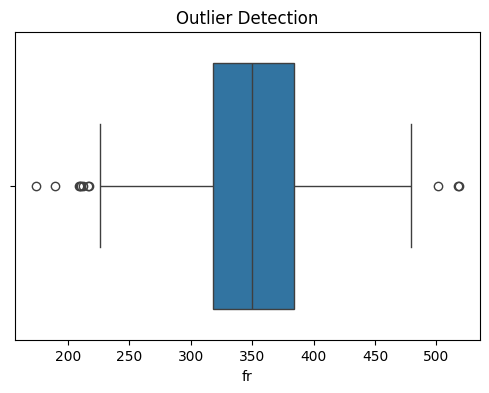

In [15]:
# Checking for outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='fr')
plt.title('Outlier Detection')
plt.show()

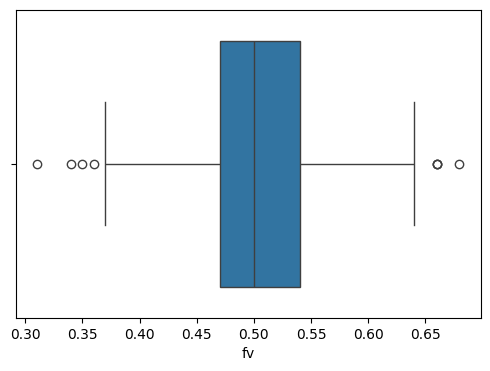

In [16]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="fv");

####  Z_Score method

In [17]:
from scipy.stats import zscore

In [18]:
from scipy.stats import zscore
import numpy as np

for col in ['fr', 'fv', 'today']:
    z = zscore(df[col])     
    mean_value = df[col].mean()              
    df[col] = np.where(np.abs(z) > 3, mean_value, df[col]) 


In [19]:
df.head()

,localtimecol,metercode,fr,fv,nettotal,today,hour
0,2025-05-02 00:00:00,BFM 01,392.96,0.54,100685.77,0.00,0
1,2025-05-02 00:15:00,BFM 01,262.06,0.51,100687.11,1.34,0
2,2025-05-02 00:30:00,BFM 01,319.94,0.50,100688.71,3.20,0
3,2025-05-02 00:45:00,BFM 01,294.27,0.46,100690.06,4.06,0
4,2025-05-02 01:00:00,BFM 01,294.65,0.51,100691.57,6.01,1


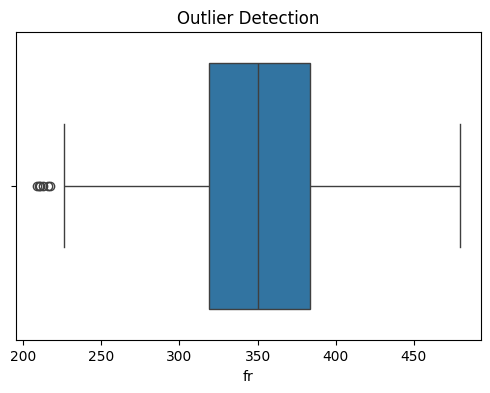

In [20]:
# Checking for outliers
plt.figure(figsize=(6,4))
sns.boxplot(data=df,x='fr')
plt.title('Outlier Detection')
plt.show()

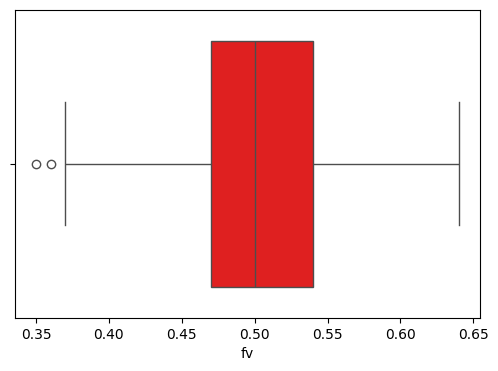

In [21]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="fv",color='red');

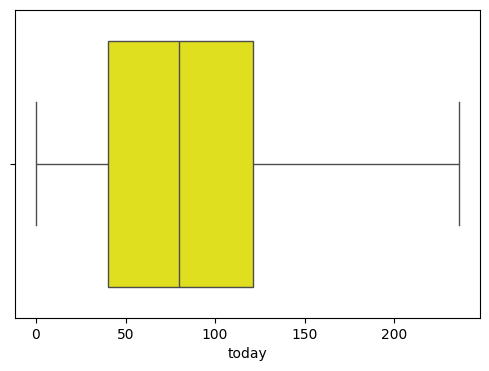

In [22]:
plt.figure(figsize=(6,4))
sns.boxplot(data=df, x="today",color='yellow');

In [23]:
df2 = df.copy()
df2.head(3)

,localtimecol,metercode,fr,fv,nettotal,today,hour
0,2025-05-02 00:00:00,BFM 01,392.96,0.54,100685.77,0.00,0
1,2025-05-02 00:15:00,BFM 01,262.06,0.51,100687.11,1.34,0
2,2025-05-02 00:30:00,BFM 01,319.94,0.50,100688.71,3.20,0


####  Linear Regression to Predict FV (Flow Volume)

In [24]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [25]:
# Splitting dfset
X = df.drop(columns=['localtimecol','metercode','fv'])
y = df['fv']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [26]:
# Train Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [27]:
lr_predictions = lr_model.predict(X_test)

In [28]:
# Function to evaluate model
def evaluate_model(y_actual, y_pred, model_name):
    print(f"{model_name} Performance:")
    print("MAE:", mean_absolute_error(y_actual, y_pred))
    print("MSE:", mean_squared_error(y_actual, y_pred))
    print("R2 Score:", r2_score(y_actual, y_pred))
    print("\n")

In [29]:
evaluate_model(y_test,lr_predictions,'Linear Regression')

Linear Regression Performance:
MAE: 0.028518975641381412
MSE: 0.0014424957688938319
R2 Score: 0.38178723044373963




In [30]:
# Function to visualize actual vs predicted values
def visualize_predictions(y_actual, y_pred, model_name):
    results_df = pd.DataFrame({'Actual': y_actual.values, 'Predicted': y_pred})
    print(results_df.head(10))
    
    plt.figure(figsize=(8,4))
    sns.scatterplot(x=y_actual, y=y_pred, color='blue', alpha=0.6)
    plt.plot([y_actual.min(), y_actual.max()], [y_actual.min(), y_actual.max()], color='red', linestyle='--')
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title(f"Actual vs Predicted - {model_name}")
    plt.show()

   Actual  Predicted
0    0.49   0.494832
1    0.47   0.486574
2    0.56   0.523635
3    0.53   0.507925
4    0.52   0.502481
5    0.53   0.511697
6    0.57   0.539201
7    0.40   0.531359
8    0.59   0.512592
9    0.50   0.499376


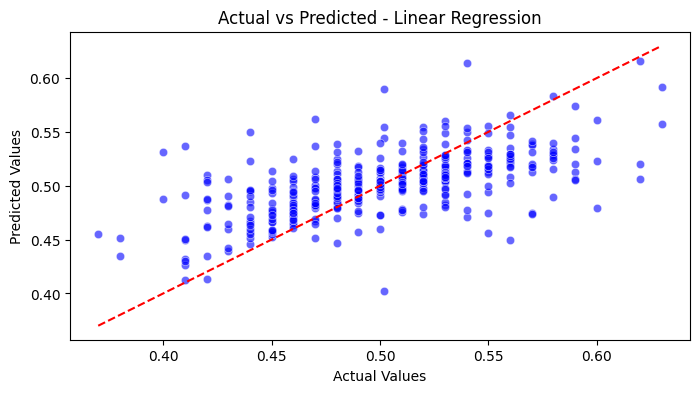

In [31]:
visualize_predictions(y_test, lr_predictions, "Linear Regression")

#### Logistic Regression for Classify Zero vs Non-Zero Usage

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [33]:
df2['zero_usage'] = (df2['today'] == 0).astype(int)
df2.head()

,localtimecol,metercode,fr,fv,nettotal,today,hour,zero_usage
0,2025-05-02 00:00:00,BFM 01,392.96,0.54,100685.77,0.00,0,1
1,2025-05-02 00:15:00,BFM 01,262.06,0.51,100687.11,1.34,0,0
2,2025-05-02 00:30:00,BFM 01,319.94,0.50,100688.71,3.20,0,0
3,2025-05-02 00:45:00,BFM 01,294.27,0.46,100690.06,4.06,0,0
4,2025-05-02 01:00:00,BFM 01,294.65,0.51,100691.57,6.01,1,0


In [34]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1920 entries, 0 to 1919
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   localtimecol  1920 non-null   datetime64[ns]
 1   metercode     1920 non-null   object        
 2   fr            1920 non-null   float64       
 3   fv            1920 non-null   float64       
 4   nettotal      1920 non-null   float64       
 5   today         1920 non-null   float64       
 6   hour          1920 non-null   int32         
 7   zero_usage    1920 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(1), object(1)
memory usage: 112.6+ KB


In [35]:
df2.zero_usage.value_counts()

zero_usage
0    1900
1      20
Name: count, dtype: int64

**Splitting the df into Training and Testing Sets**

In [36]:
X = df2[['hour', 'fr', 'fv']]
y = df2['zero_usage']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
log_model = LogisticRegression()
log_model.fit(X_train, y_train)

LogisticRegression()

In [38]:
y_pred = log_model.predict(X_test)

In [39]:
predicted_results = log_model.predict(X_test)
predicted_results

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [40]:
np.array(y_test)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

**Evaluating the Model Performance**

In [41]:
from sklearn.metrics import classification_report, confusion_matrix

In [42]:
cm = confusion_matrix(y_test, predicted_results)
cm

array([[380,   0],
       [  4,   0]])

In [43]:
print(classification_report(y_test, predicted_results))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       380
           1       0.00      0.00      0.00         4

    accuracy                           0.99       384
   macro avg       0.49      0.50      0.50       384
weighted avg       0.98      0.99      0.98       384



C:\Users\Home_Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Home_Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Home_Pc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

###  Forecast next 7 days’ consumption

In [47]:
from prophet import Prophet

In [72]:
original_data.head()

,localtimecol,metercode,fr,fv,nettotal,today
0,2025-05-02 00:00:00,BFM 01,392.96,0.54,100685.77,0.00
1,2025-05-02 00:15:00,BFM 01,262.06,0.51,100687.11,1.34
2,2025-05-02 00:30:00,BFM 01,319.94,0.50,100688.71,3.20
3,2025-05-02 00:45:00,BFM 01,294.27,0.46,100690.06,4.06
4,2025-05-02 01:00:00,BFM 01,294.65,0.51,100691.57,6.01


In [53]:
df_prophet = original_data[['localtimecol', 'today']].rename(columns={'localtimecol': 'ds', 'today': 'y'})

In [54]:
df_prophet = df_prophet.resample('h', on='ds').mean().reset_index()

In [73]:
df_prophet.head()

,ds,y
0,2025-05-02 00:00:00,2.58675
1,2025-05-02 01:00:00,10.04450
2,2025-05-02 02:00:00,16.51500
3,2025-05-02 03:00:00,23.71100
4,2025-05-02 04:00:00,30.57750


In [70]:
model = Prophet()
model.fit(df_prophet)

13:49:41 - cmdstanpy - INFO - Chain [1] start processing
13:49:42 - cmdstanpy - INFO - Chain [1] done processing


In [74]:
future = model.make_future_dataframe(periods=7*24, freq='h')
forecast = model.predict(future)

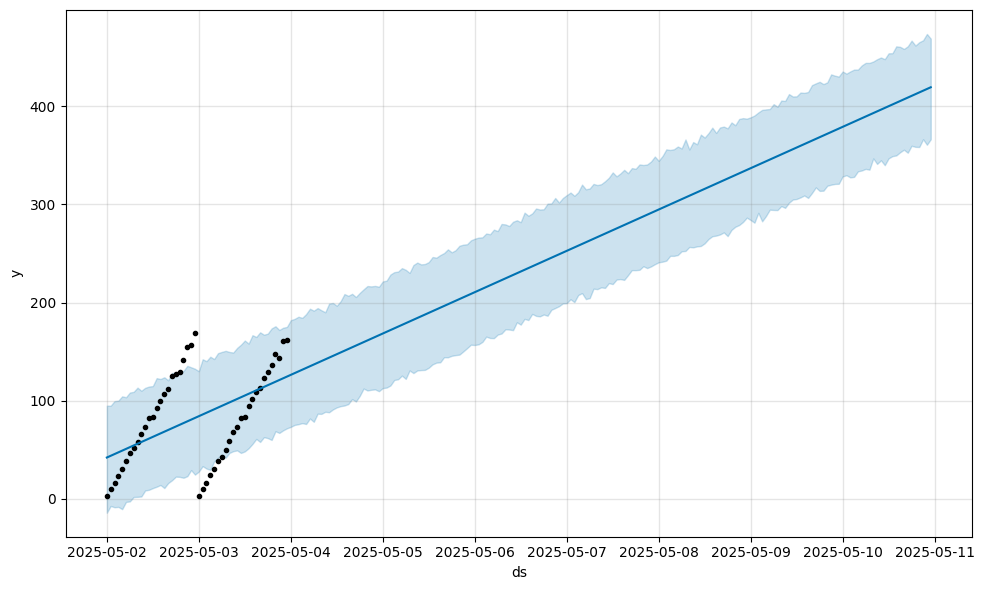

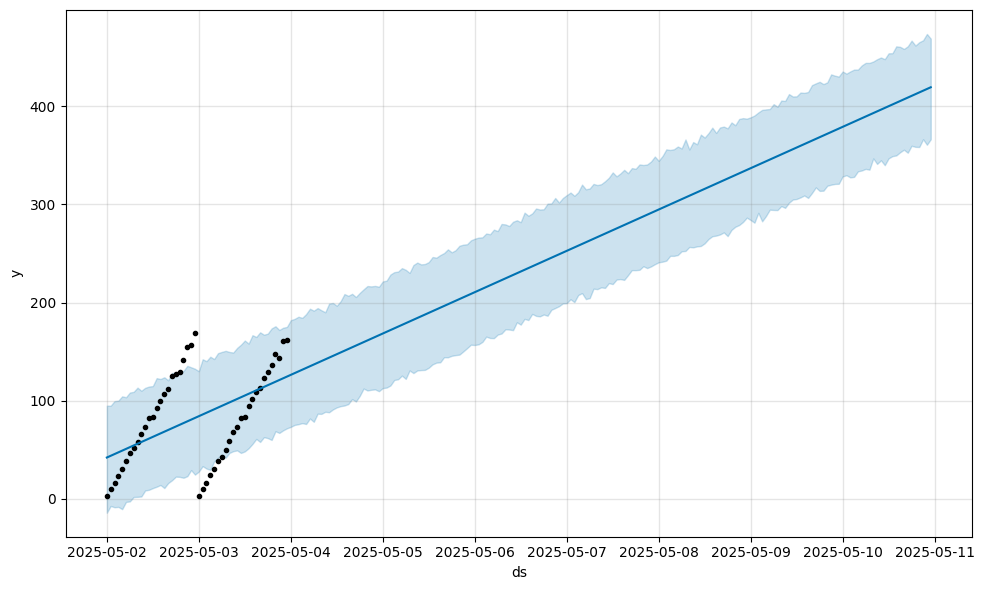

In [75]:
model.plot(forecast)

##### The blue line (forecast) shows a steady upward trend

##### 1. The prophet has learned the data and confidently forecast the usage of consumption upto 11th may 2025.
##### 2. The black dots mostly lie within the shaded area, which means Prophet has captured the pattern well. 
##### 3. upward slope suggest there will be increase in the consumption.